Evaluacion de Algoritmos de Regresion

En esta practica veremos como aplicar diferentes tecnicas para la evaluacion de algoritmos de regresion

1.- Root Mean Squate (RMSE)
2.-Mean Absolute Error (MAE)
3.-Coeficiente de determinacion R´2
4.-Grafico predicho vs real

Trabajaremos sobre el conjunto de datos winequality-red

In [3]:
import pandas as pd
import numpy as np
from sklearn import datasets
from matplotlib.pylab import rcParams
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
import itertools

In [4]:
warnings.filterwarnings("ignore") #especidifcar que se ignores los mensajes de advertencia

Carga de datos

In [7]:
#datos de caracteristicas del conjunto de datos
df_wine = pd.read_csv("winequality-red.csv")
df_wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Tratamiento de missings

In [9]:
#valores nulos
df_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Comprobamos el valor medio de la variable dependiente "quality"

<AxesSubplot:xlabel='quality', ylabel='Density'>

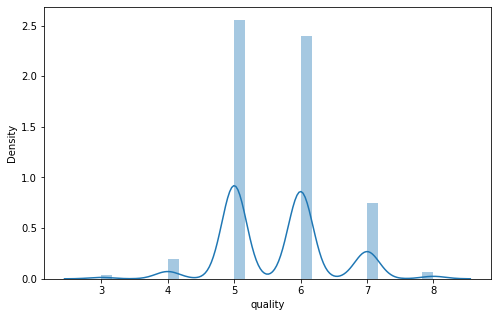

In [11]:
plt.figure(figsize=(8,5))
plt.tight_layout()
sns.distplot(df_wine["quality"])

Modelo de regresion Lineal

Determinar el conjunto de modelizacion y el de validacion

In [16]:
x = df_wine[list(df_wine.columns)[:-1]] #se excluye la columna "quality"
y= df_wine["quality"]
#dividir conjunto train/test
x_train ,x_test ,  y_train , y_test = train_test_split(x,y,train_size = 0.8 , random_state = 0)

In [18]:
#entrenar el modelo
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [20]:
#coeficientes que nuestro modelo de regresion ha elejido
coef_dfwine = pd.DataFrame(regressor.coef_ , x.columns , columns = ["Coeficiente"])
coef_dfwine

,Coeficiente
fixed acidity,0.041284
volatile acidity,-1.149528
citric acid,-0.177927
residual sugar,0.027870
chlorides,-1.873407
free sulfur dioxide,0.002684
total sulfur dioxide,-0.002777
density,-31.516666
pH,-0.254486
sulphates,0.924040


In [21]:
#predicciones sobre conjunto de prueba
y_pred = regressor.predict(x_test)

Metricas

1.- Root Mean Square Error (RMSE)

In [22]:
print ("RMSE:" , np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

RMSE: 0.620057414938428


2.- Mean Absolute Error(MAE)

In [23]:
print ("MAE : " , metrics.mean_absolute_error(y_test,y_pred))

MAE :  0.4696330928661128


Coeficiente de determinacion R´2

In [24]:
print("Coeficiente de determinacion R´2 :" , regressor.score(x,y) )

Coeficiente de determinacion R´2 : 0.3593724283394679


Grafico Prechivo vs Real

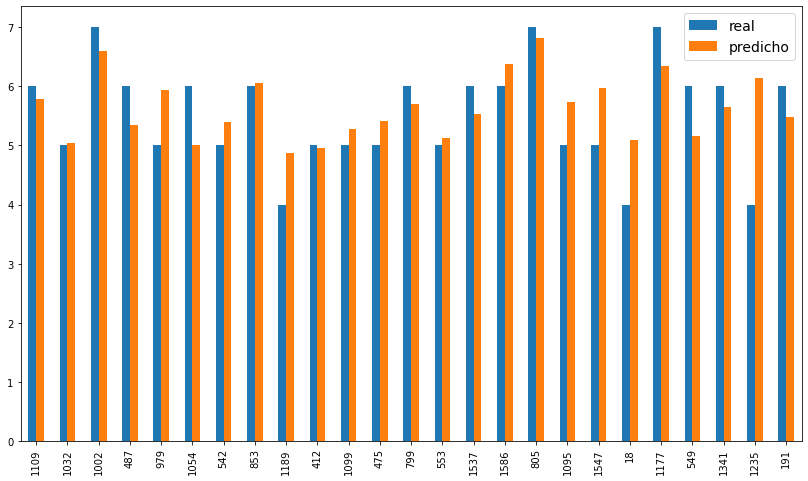

In [26]:
df = pd.DataFrame ({"real" : y_test , "predicho" : y_pred})
df1 = df.head(25) #seleccionamos los 25 primeros valores
df1.plot(kind = "bar" , figsize = (14,8))
plt.legend(loc = 1 , prop = {"size" : 14})
plt.show()